## Dokumentasi Project STKI
# 1.  Judul / Topik Project dan Identitas Lengkap
Judul: Segmentasi Pelanggan Menggunakan Model RFM (Recency, Frequency, Monetary) untuk Strategi Pemasaran
Identitas Lengkap:
•	Nama: [Isi Nama Anda]
•	NIM: [Isi NIM Anda]
•	Universitas: Dian Nuswantoro University
•	Program Studi: Teknologi Informasi
•	Semester: Lima
________________________________________
# 2. Ringkasan dan Permasalahan Project
Ringkasan
Proyek ini bertujuan untuk melakukan segmentasi pelanggan menggunakan model RFM (Recency, Frequency, Monetary). Model ini membantu memahami perilaku pelanggan berdasarkan waktu pembelian terakhir (Recency), frekuensi pembelian (Frequency), dan total pendapatan yang dihasilkan (Monetary). Segmentasi ini diharapkan dapat membantu perusahaan dalam merancang strategi pemasaran yang lebih efektif dan personal.
Permasalahan
1.	Sulitnya mengidentifikasi pelanggan yang paling bernilai.
2.	Kesulitan memahami perilaku pembelian pelanggan.
3.	Strategi pemasaran yang tidak efektif karena kurangnya segmentasi pelanggan yang akurat.
Tujuan
1.	Mengelompokkan pelanggan ke dalam segmen berdasarkan nilai RFM mereka.
2.	Memberikan wawasan yang dapat digunakan untuk meningkatkan efisiensi strategi pemasaran.
Model / Alur Penyelesaian
Bagan berikut menjelaskan alur penyelesaian:
graph TD
A[Mulai] --> B[Import Dataset]
B --> C[EDA dan Preprocessing Dataset]
C --> D[Penghitungan RFM]
D --> E[K-Means Clustering untuk Segmentasi]
E --> F[Evaluasi Performa Model]
F --> G[Analisis dan Kesimpulan]
________________________________________
#  3. Penjelasan Dataset, EDA, dan Proses Features Dataset
Dataset
Dataset yang digunakan adalah "Online Retail" yang berisi data transaksi e-commerce. Kolom utama yang digunakan:
-	InvoiceNo: Nomor faktur transaksi.
-	StockCode: Kode produk.
-	Description: Deskripsi produk.
-	Quantity: Jumlah produk yang dibeli.
-	InvoiceDate: Tanggal transaksi.
-	UnitPrice: Harga satuan produk.
-	CustomerID: ID pelanggan.
-	Country: Negara pelanggan.
EDA (Exploratory Data Analysis)
1.	Pengecekan Missing Values: Mengidentifikasi data yang hilang.
2.	Descriptive Statistics: Melihat distribusi nilai kuantitatif seperti Quantity dan UnitPrice.
3.	Outlier Handling: Menghapus nilai-nilai ekstrem menggunakan metode IQR.
4.	Distribusi Data:
o	Distribusi Quantity dan UnitPrice.
o	Negara dengan jumlah transaksi terbanyak.
Proses Features Dataset
1.	Recency: Dihitung sebagai selisih antara tanggal transaksi terakhir dengan tanggal analisis.
2.	Frequency: Jumlah faktur unik per pelanggan.
3.	Monetary: Total pendapatan yang dihasilkan oleh setiap pelanggan.
________________________________________
# 4.Proses Learning / Modeling
Clustering dengan K-Means
1.	Penentuan Jumlah Cluster: Menggunakan metode elbow untuk menentukan jumlah optimal cluster berdasarkan inertia.
2.	Pembuatan Cluster RFM:
o	RecencyCluster: Pelanggan dikelompokkan berdasarkan recency.
o	FrequencyCluster: Pelanggan dikelompokkan berdasarkan frequency.
o	RevenueCluster: Pelanggan dikelompokkan berdasarkan revenue.
3.	Skor RFM: Menggabungkan cluster untuk menghasilkan skor RFM yang merepresentasikan segmen pelanggan.
Pipeline Segmentasi
1.	Data preprocessing: Pembersihan data.
2.	Ekstraksi fitur RFM.
3.	Clustering K-Means pada masing-masing dimensi RFM.
4.	Labeling segmen pelanggan (Platinum, Gold, Silver, Bronze, Diamond).
________________________________________
# 5. Performa Model
Evaluasi Model
Silhouette score digunakan untuk mengevaluasi performa segmentasi:
•	Silhouette Score: 0.8515 (clustering RFM menunjukkan separasi cluster yang baik).
________________________________________
# 6. Diskusi Hasil dan Kesimpulan
Hasil Diskusi
1.	Distribusi Pelanggan:
-	Sebagian besar pelanggan berada di segmen Bronze, menunjukkan kontribusi yang lebih rendah dalam hal frekuensi dan pendapatan.
-	Segmen Diamond mewakili pelanggan yang memberikan kontribusi pendapatan terbesar.
2.	Strategi Pemasaran:
-	Platinum dan Diamond: Fokus pada retensi pelanggan dengan promosi eksklusif.
-	Silver dan Gold: Tingkatkan frekuensi pembelian dengan penawaran khusus.
-	Bronze: Libatkan pelanggan melalui kampanye promosi untuk meningkatkan pendapatan.
Kesimpulan
Segmentasi RFM berhasil mengidentifikasi segmen pelanggan berdasarkan perilaku belanja mereka. Model ini memberikan wawasan yang berharga untuk menyusun strategi pemasaran yang lebih terarah.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from jcopml.plot import plot_missing_value
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("OnlineRetail.csv",on_bad_lines='skip', encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


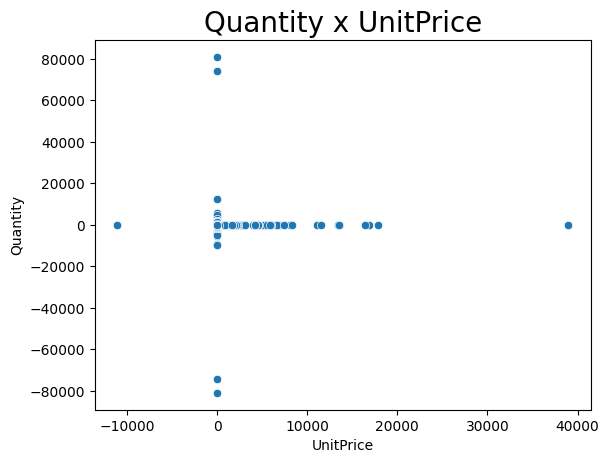

In [6]:
sns.scatterplot(x=df['UnitPrice'], y=df['Quantity'])
plt.title('Quantity x UnitPrice', fontsize = 20);

C:\Users\Natanael\AppData\Local\Temp\ipykernel_16300\162478098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'])


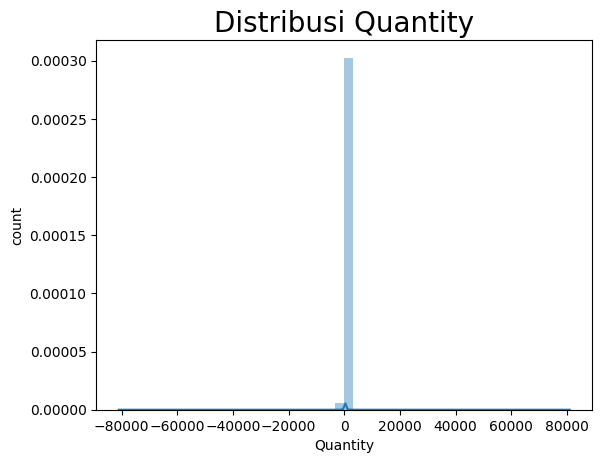

In [7]:
sns.distplot(df['Quantity'])
plt.title('Distribusi Quantity', fontsize = 20)
plt.xlabel('Quantity')
plt.ylabel('count');

C:\Users\Natanael\AppData\Local\Temp\ipykernel_16300\3940843973.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['UnitPrice'])


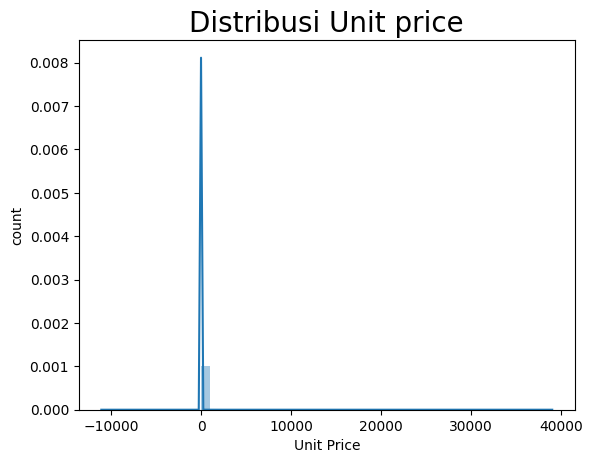

In [8]:
sns.distplot(df['UnitPrice'])
plt.title('Distribusi Unit price', fontsize = 20)
plt.xlabel('Unit Price')
plt.ylabel('count');

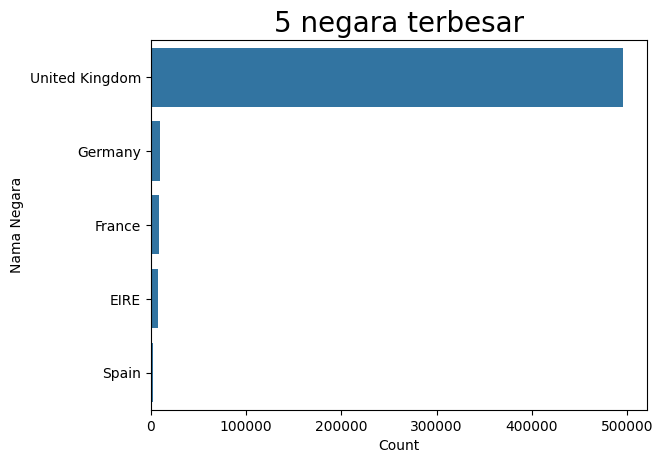

In [9]:
x = df['Country'].value_counts().head(5)
sns.barplot(x = x.values, y = x.index, )
plt.title('5 negara terbesar', fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Nama Negara');

In [10]:
x = df['Country'].nunique()
print("Terdapat total {} negara".format(x))

country = pd.DataFrame(df['Country'].value_counts()).reset_index()
country.columns = ['Negara', 'Jumlah Transaksi']
country

Terdapat total 38 negara


,Negara,Jumlah Transaksi
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
uk = df[df['Country'] == 'United Kingdom']
uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## recency

In [13]:
df = pd.DataFrame(df['CustomerID'].unique())
df.columns = ['CustomerID']
df.head()

,CustomerID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


In [14]:
latest_purchase = uk.groupby('CustomerID').InvoiceDate.max().reset_index()
latest_purchase.columns = ['CustomerID','LatestPurchaseDate']
latest_purchase.head()

,CustomerID,LatestPurchaseDate
0,12346.0,2011-01-18 10:17:00
1,12747.0,2011-12-07 14:34:00
2,12748.0,2011-12-09 12:20:00
3,12749.0,2011-12-06 09:56:00
4,12820.0,2011-12-06 15:12:00


In [15]:
latest_purchase['Recency'] = (latest_purchase['LatestPurchaseDate'].max() - latest_purchase['LatestPurchaseDate']).dt.days
latest_purchase.head()

,CustomerID,LatestPurchaseDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,3
4,12820.0,2011-12-06 15:12:00,2


In [16]:
df = pd.merge(df, latest_purchase[['CustomerID','Recency']], on='CustomerID')
df.head()

,CustomerID,Recency
0,17850.0,301
1,13047.0,31
2,13748.0,95
3,15100.0,329
4,15291.0,25


C:\Users\Natanael\AppData\Local\Temp\ipykernel_16300\3777644000.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Recency'], kde=False, bins=50)


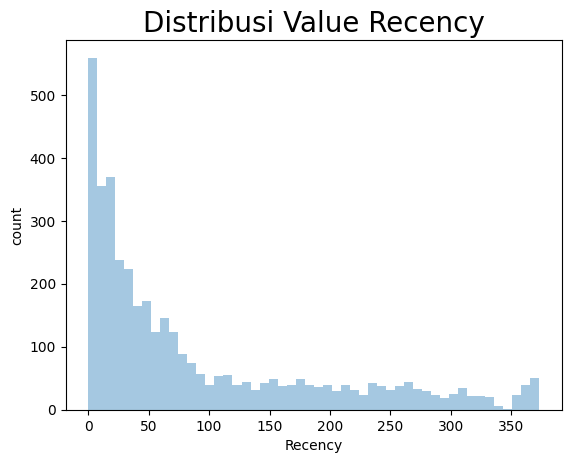

In [17]:
sns.distplot(df['Recency'], kde=False, bins=50)
plt.title('Distribusi Value Recency', fontsize = 20)
plt.xlabel('Recency')
plt.ylabel('count');

tentukan jumlah cluster

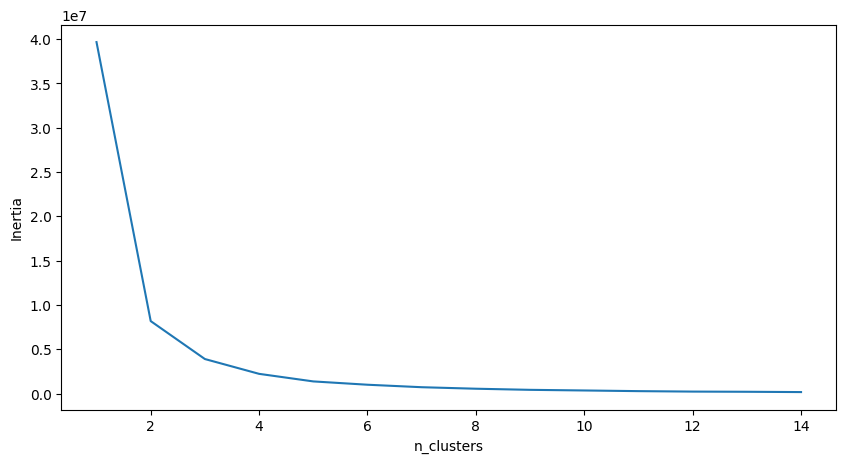

In [18]:
score = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    member = kmeans.fit_predict(np.array(df['Recency']).reshape(-1, 1))
    score.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), score)
plt.ylabel("Inertia")
plt.xlabel("n_clusters");

hitung recency score

In [19]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['Recency']])
df['RecencyCluster'] = kmeans.predict(df[['Recency']])
df.head()

,CustomerID,Recency,RecencyCluster
0,17850.0,301,1
1,13047.0,31,0
2,13748.0,95,2
3,15100.0,329,1
4,15291.0,25,0


In [20]:
df.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,2055.0,19.135766,14.722310,0.0,7.0,17.0,30.0,51.0
1,450.0,307.997778,39.742349,250.0,273.0,303.0,351.0,373.0
2,884.0,83.245475,23.818627,52.0,63.0,77.0,100.0,137.0
3,561.0,190.843137,31.871455,138.0,164.0,189.0,217.0,249.0


mengurutkan kasta cluster

In [21]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [22]:
df = order_cluster('RecencyCluster', 'Recency',df,False)
df.head()

,CustomerID,Recency,RecencyCluster
0,17850.0,301,0
1,13047.0,31,3
2,13748.0,95,2
3,15100.0,329,0
4,15291.0,25,3


In [23]:
df.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,450.0,307.997778,39.742349,250.0,273.0,303.0,351.0,373.0
1,561.0,190.843137,31.871455,138.0,164.0,189.0,217.0,249.0
2,884.0,83.245475,23.818627,52.0,63.0,77.0,100.0,137.0
3,2055.0,19.135766,14.722310,0.0,7.0,17.0,30.0,51.0


## Frquency

In [24]:
frequency = uk.groupby('CustomerID').InvoiceDate.count().reset_index()
frequency.columns = ['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12747.0,103
2,12748.0,4642
3,12749.0,231
4,12820.0,59


In [25]:
df = pd.merge(df, frequency, on='CustomerID')
df.head()

,CustomerID,Recency,RecencyCluster,Frequency
0,17850.0,301,0,312
1,13047.0,31,3,196
2,13748.0,95,2,28
3,15100.0,329,0,6
4,15291.0,25,3,109


In [26]:
df.Frequency.describe()

count    3950.000000
mean       91.614684
std       220.557389
min         1.000000
25%        17.000000
50%        41.000000
75%       101.000000
max      7983.000000
Name: Frequency, dtype: float64

C:\Users\Natanael\AppData\Local\Temp\ipykernel_16300\3830287745.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Frequency'], kde=False, bins=50)


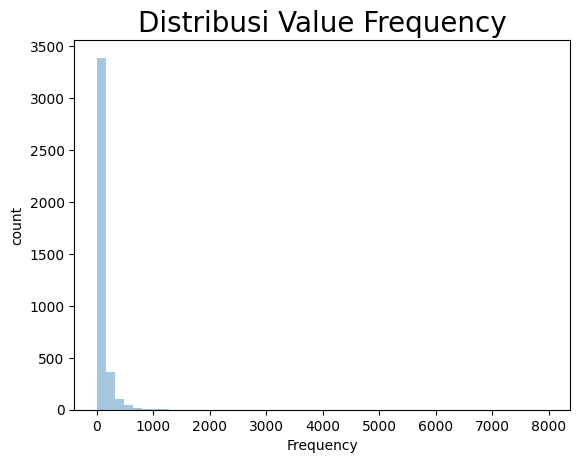

In [27]:
sns.distplot(df['Frequency'], kde=False, bins=50)
plt.title('Distribusi Value Frequency', fontsize = 20)
plt.xlabel('Frequency')
plt.ylabel('count');

menentukan jumlah cluster

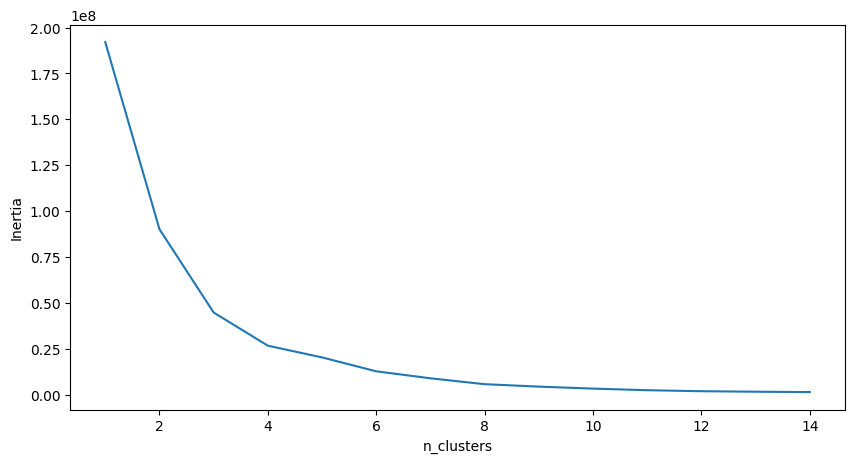

In [28]:
score = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    member = kmeans.fit_predict(np.array(df['Frequency']).reshape(-1, 1))
    score.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), score)
plt.ylabel("Inertia")
plt.xlabel("n_clusters");

hitung frequency score

In [29]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['Frequency']])
df['FrequencyCluster'] = kmeans.predict(df[['Frequency']])
df.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,17850.0,301,0,312,2
1,13047.0,31,3,196,2
2,13748.0,95,2,28,0
3,15100.0,329,0,6,0
4,15291.0,25,3,109,0


In [30]:
df = order_cluster('FrequencyCluster', 'Frequency',df,True)
df.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,17850.0,301,0,312,1
1,13047.0,31,3,196,1
2,13748.0,95,2,28,0
3,15100.0,329,0,6,0
4,15291.0,25,3,109,0


In [31]:
df.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3496.0,49.525744,44.954212,1.0,15.0,33.0,73.0,190.0
1,429.0,331.221445,133.856510,191.0,228.0,287.0,399.0,803.0
2,22.0,1313.136364,505.934524,872.0,988.5,1140.0,1452.0,2782.0
3,3.0,5917.666667,1805.062418,4642.0,4885.0,5128.0,6555.5,7983.0


## Monetary Value (Revenue)

In [32]:
uk['Revenue'] = uk['UnitPrice'] * uk['Quantity']
revenue = uk.groupby('CustomerID').Revenue.sum().reset_index()
revenue.head()

,CustomerID,Revenue
0,12346.0,0.00
1,12747.0,4196.01
2,12748.0,29072.10
3,12749.0,3868.20
4,12820.0,942.34


In [33]:
df = pd.merge(df, revenue, on='CustomerID')
df.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,17850.0,301,0,312,1,5288.63
1,13047.0,31,3,196,1,3079.10
2,13748.0,95,2,28,0,948.25
3,15100.0,329,0,6,0,635.10
4,15291.0,25,3,109,0,4596.51


In [34]:
df['Revenue'].describe()

count      3950.000000
mean       1713.385669
std        6548.608224
min       -4287.630000
25%         282.255000
50%         627.060000
75%        1521.782500
max      256438.490000
Name: Revenue, dtype: float64

C:\Users\Natanael\AppData\Local\Temp\ipykernel_16300\922952375.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Revenue'], kde=False, bins=50)


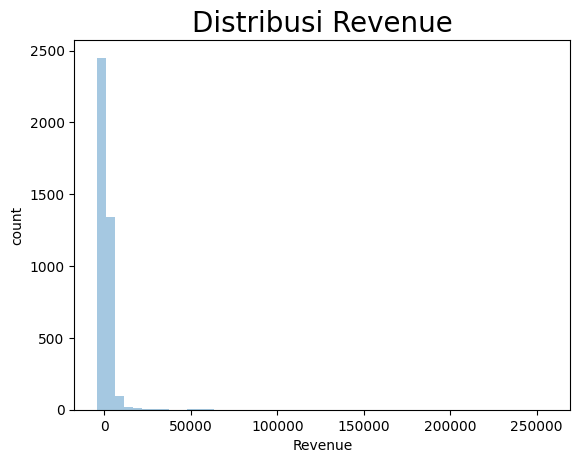

In [35]:
sns.distplot(df['Revenue'], kde=False, bins=50)
plt.title('Distribusi Revenue', fontsize = 20)
plt.xlabel('Revenue')
plt.ylabel('count');

Tentukan Jumlah Cluster

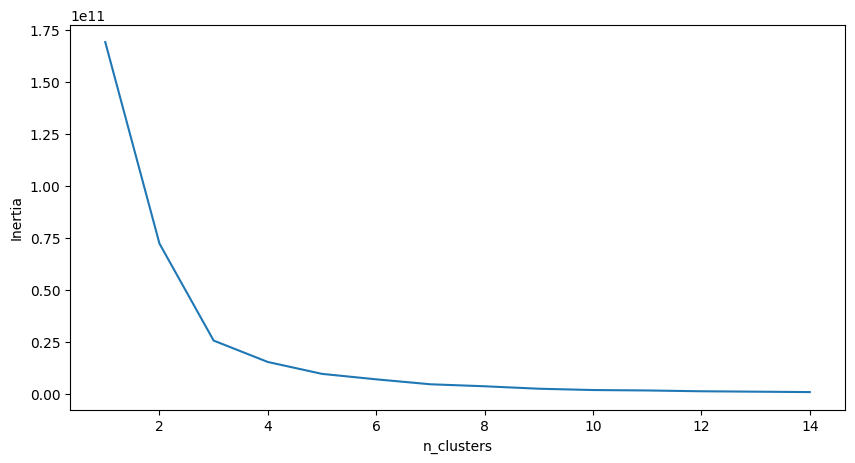

In [36]:
score = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    member = kmeans.fit_predict(np.array(df['Revenue']).reshape(-1, 1))
    score.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), score)
plt.ylabel("Inertia")
plt.xlabel("n_clusters");

Hitung Monetary Score¶

In [37]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['Revenue']])
df['RevenueCluster'] = kmeans.predict(df[['Revenue']])
df.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,17850.0,301,0,312,1,5288.63,3
1,13047.0,31,3,196,1,3079.10,0
2,13748.0,95,2,28,0,948.25,0
3,15100.0,329,0,6,0,635.10,0
4,15291.0,25,3,109,0,4596.51,3


In [38]:
df = order_cluster('RevenueCluster', 'Revenue',df,True)
df.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,17850.0,301,0,312,1,5288.63,1
1,13047.0,31,3,196,1,3079.10,0
2,13748.0,95,2,28,0,948.25,0
3,15100.0,329,0,6,0,635.10,0
4,15291.0,25,3,109,0,4596.51,1


In [39]:
df.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3689.0,909.114447,925.115347,-4287.63,263.550,572.81,1259.560,4345.50
1,232.0,7790.204828,3638.855886,4379.65,5188.815,6590.45,9183.665,21535.90
2,27.0,43070.445185,15939.249588,25748.35,28865.490,36351.42,53489.790,88125.38
3,2.0,221960.330000,48759.481478,187482.17,204721.250,221960.33,239199.410,256438.49


## Hitung Score RFM secara keseluruhan

In [40]:
df['RFM_score'] = df['RecencyCluster'] + df['FrequencyCluster'] + df['RevenueCluster']
df.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,RFM_score
0,17850.0,301,0,312,1,5288.63,1,2
1,13047.0,31,3,196,1,3079.10,0,4
2,13748.0,95,2,28,0,948.25,0,2
3,15100.0,329,0,6,0,635.10,0,0
4,15291.0,25,3,109,0,4596.51,1,4


In [41]:
df['RFM_score'].unique()

array([2, 4, 0, 5, 7, 6, 3, 1, 8])

In [42]:
df.groupby('RFM_score')[['Recency', 'Frequency', 'Revenue']].mean()
df.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,RFM_score
0,17850.0,301,0,312,1,5288.63,1,2
1,13047.0,31,3,196,1,3079.10,0,4
2,13748.0,95,2,28,0,948.25,0,2
3,15100.0,329,0,6,0,635.10,0,0
4,15291.0,25,3,109,0,4596.51,1,4


In [43]:
df['label'] = 'Bronze' 
df.loc[df['RFM_score'] > 1, 'label'] = 'Silver'
df.loc[df['RFM_score'] > 2, 'label'] = 'Gold'
df.loc[df['RFM_score'] > 3, 'label'] = 'Platinum'
df.loc[df['RFM_score'] > 5, 'label'] = 'Diamond'

df.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,RFM_score,label
0,17850.0,301,0,312,1,5288.63,1,2,Silver
1,13047.0,31,3,196,1,3079.10,0,4,Platinum
2,13748.0,95,2,28,0,948.25,0,2,Silver
3,15100.0,329,0,6,0,635.10,0,0,Bronze
4,15291.0,25,3,109,0,4596.51,1,4,Platinum


  Gold  Bronze  Silver  Platinum  Diamond
  1610    1001     854       448       37


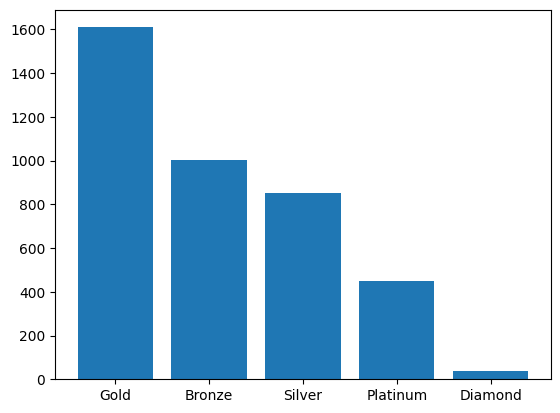

In [44]:
barplot = dict(df['label'].value_counts())
bar_names = list(barplot.keys())
bar_values = list(barplot.values())
plt.bar(bar_names,bar_values)
print(pd.DataFrame(barplot, index=[' ']))

In [45]:
X_rfm = df[['Recency', 'Frequency', 'Revenue']]

kmeans_rfm = KMeans(n_clusters=4, random_state=42)
kmeans_rfm.fit(X_rfm)

labels_rfm = kmeans_rfm.labels_

sil_score_rfm = silhouette_score(X_rfm, labels_rfm)
print(f"Silhouette Score for RFM clustering: {sil_score_rfm:.4f}")

Silhouette Score for RFM clustering: 0.8515
